# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [19]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [4]:
# cities = ["Tokyo", "Minneapolis", "Osaka", "Chicago","Tokyo", "Minneapolis", "Osaka", "Chicago","Tokyo", "Minneapolis", "Osaka", "Chicago","Tokyo", "Minneapolis", "Osaka", "Chicago","Tokyo", "Minneapolis", "Osaka", "Chicago","Tokyo", "Minneapolis", "Osaka", "Chicago","Tokyo", "Minneapolis", "Osaka", "Chicago""Tokyo", "Minneapolis", "Osaka", "Chicago""Tokyo", "Minneapolis", "Osaka", "Chicago""Tokyo", "Minneapolis", "Osaka", "Chicago","Tokyo", "Minneapolis", "Osaka", "Chicago","Tokyo", "Minneapolis", "Osaka", "Chicago","Tokyo", "Minneapolis", "Osaka", "Chicago","Tokyo", "Minneapolis", "Osaka", "Chicago"]

# for index, city in enumerate(cities, start = 1):
#     try:
#         response = requests.get(query_url + city).json()
#         city_name_list.append(response["name"])
#         cloudiness_list.append(response["clouds"]["all"])
#         country_list.append(response["sys"]["country"])
#         date_list.append(response["dt"])
#         humidity_list.append(response["main"]["humidity"])
#         lat_list.append(response["coord"]["lat"])
#         lng_list.append(response["coord"]["lon"])
#         max_temp_list.append(response['main']['temp_max'])
#         wind_speed_list.append(response["wind"]["speed"])
        
#         if index_counter > 49:
#             index_counter = 0
#             set_counter = set_counter + 1
    
#         else:
#             index_counter = index_counter + 1
            
#         print(f"Processing Record {index} of Set {set_counter} : {city}") 
#         ## Fix Index # and Set number ##
  
#     except:
#         print("City not found. Skipping...")

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : atuona
Processing Record 2 of Set 1 : ushuaia
Processing Record 3 of Set 1 : ribeira grande
Processing Record 4 of Set 1 : punta arenas
Processing Record 5 of Set 1 : quelimane
Processing Record 6 of Set 1 : hilo
Processing Record 7 of Set 1 : kulhudhuffushi
Processing Record 8 of Set 1 : narsaq
Processing Record 9 of Set 1 : bengkulu
Processing Record 10 of Set 1 : abnub
Processing Record 11 of Set 1 : mahebourg
Processing Record 12 of Set 1 : rikitea
Processing Record 13 of Set 1 : itoman
Processing Record 14 of Set 1 : jamestown
Processing Record 15 of Set 1 : vestmannaeyjar
Processing Record 16 of Set 1 : turukhansk
Processing Record 17 of Set 1 : mataura
Processing Record 18 of Set 1 : quesnel
Processing Record 19 of Set 1 : yellowknife
Processing Record 20 of Set 1 : busselton
City not found. Skipping...
Processing Record 22 of Set 1 : tulum
Processing Record 23 of Set 1 : nikolskoye
Processing

Processing Record 203 of Set 4 : college
Processing Record 204 of Set 4 : padang
Processing Record 205 of Set 4 : korla
Processing Record 206 of Set 4 : arlit
Processing Record 207 of Set 4 : bambanglipuro
Processing Record 208 of Set 4 : hambantota
Processing Record 209 of Set 4 : kununurra
Processing Record 210 of Set 4 : cayenne
Processing Record 211 of Set 4 : mehamn
Processing Record 212 of Set 4 : vanavara
Processing Record 213 of Set 4 : pacific grove
City not found. Skipping...
Processing Record 215 of Set 4 : gao
Processing Record 216 of Set 4 : luangwa
Processing Record 217 of Set 4 : half moon bay
Processing Record 218 of Set 4 : mar del plata
Processing Record 219 of Set 4 : guerrero negro
Processing Record 220 of Set 4 : avarua
Processing Record 221 of Set 4 : wetaskiwin
Processing Record 222 of Set 4 : kahului
Processing Record 223 of Set 4 : fort-shevchenko
Processing Record 224 of Set 4 : sioux lookout
Processing Record 225 of Set 4 : esperance
Processing Record 226 of 

Processing Record 404 of Set 8 : kashin
Processing Record 405 of Set 8 : monte alegre
Processing Record 406 of Set 8 : soyo
Processing Record 407 of Set 8 : atar
Processing Record 408 of Set 8 : airai
Processing Record 409 of Set 8 : lazaro cardenas
City not found. Skipping...
Processing Record 411 of Set 8 : payo
Processing Record 412 of Set 8 : belyy yar
Processing Record 413 of Set 8 : santa cruz
Processing Record 414 of Set 8 : karratha
Processing Record 415 of Set 8 : bijar
Processing Record 416 of Set 8 : palana
Processing Record 417 of Set 8 : flagstaff
Processing Record 418 of Set 8 : lyuban
Processing Record 419 of Set 8 : ornskoldsvik
City not found. Skipping...
Processing Record 421 of Set 8 : antofagasta
Processing Record 422 of Set 8 : ostersund
Processing Record 423 of Set 8 : anshun
Processing Record 424 of Set 8 : dingle
Processing Record 425 of Set 8 : taywarah
Processing Record 426 of Set 8 : guadalupe y calvo
Processing Record 427 of Set 8 : najran
Processing Record 

Processing Record 601 of Set 11 : saint-denis
Processing Record 602 of Set 11 : barcelos
Processing Record 603 of Set 11 : eyl
Processing Record 604 of Set 11 : zaozerne
Processing Record 605 of Set 11 : am timan
Processing Record 606 of Set 11 : fort myers beach
Processing Record 607 of Set 11 : lat yao
Processing Record 608 of Set 11 : banda aceh
Processing Record 609 of Set 11 : mundwa
Processing Record 610 of Set 11 : oarai
Processing Record 611 of Set 11 : orikum
Processing Record 612 of Set 11 : mikhaylovka
City not found. Skipping...
Processing Record 614 of Set 12 : namibe
Processing Record 615 of Set 12 : haines junction
Processing Record 616 of Set 12 : angoram
Processing Record 617 of Set 12 : rancho palos verdes
Processing Record 618 of Set 12 : nueve de julio
Processing Record 619 of Set 12 : sibolga
Processing Record 620 of Set 12 : sao filipe
City not found. Skipping...
Processing Record 622 of Set 12 : nerekhta
-----------------------------
Data Retrieval Complete
-----

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
print(f"City {len(city_name_list)}")
print(len(cloudiness_list))
print(len(country_list))
print(len(date_list))
print(f"Humidity {len(humidity_list)}")
print(len(lat_list))
print(len(lng_list))
print(len(max_temp_list))
print(len(wind_speed_list))

City 568
568
568
568
Humidity 568
568
568
568
568


In [39]:
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lnt" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lnt,Max Temp,Wind Speed
0,Atuona,100,PF,1579320342,73,-9.80,-139.03,81.70,17.20
1,Ushuaia,90,AR,1579320342,81,-54.80,-68.30,46.40,12.75
2,Ribeira Grande,60,PT,1579320342,92,38.52,-28.70,58.84,6.87
3,Punta Arenas,40,CL,1579320342,76,-53.15,-70.92,50.00,19.46
4,Quelimane,40,MZ,1579320342,94,-17.88,36.89,80.60,3.36
...,...,...,...,...,...,...,...,...,...
563,Rancho Palos Verdes,40,US,1579320420,62,33.74,-118.39,57.20,10.29
564,Nueve de Julio,85,AR,1579320420,93,-35.44,-60.88,66.99,1.01
565,Sibolga,10,ID,1579320421,59,1.74,98.78,85.82,2.06
566,Sao Filipe,0,CV,1579320421,71,14.90,-24.50,69.75,14.41


In [46]:
# Save city data into a csv file
weather_dict.to_csv("weather_data.csv", index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

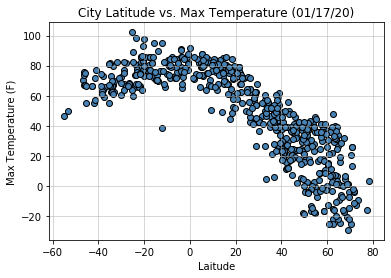

In [23]:
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../Images/City Latitude vs Max Temperature.png")

#### Latitude vs. Humidity Plot

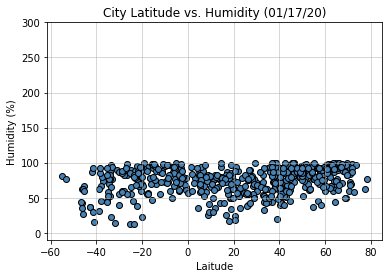

In [24]:
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.ylim(-10,300)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../Images/City Latitude vs Humidity.png")


## Why can't we set ylim as 100? 

#### Latitude vs. Cloudiness Plot

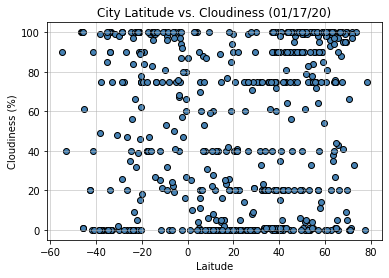

In [25]:
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../Images/City Latitude vs Cloudiness.png")

#### Latitude vs. Wind Speed Plot

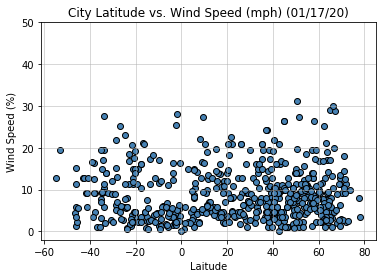

In [26]:
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [37]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0, 'y = -1.28x + 88.97')

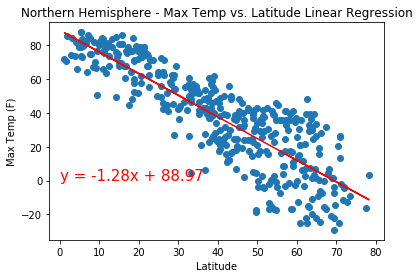

In [29]:
#print(f"The r-squared is : {round(st.pearsonr(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Set y = mx + b
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Set the regression line
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(-30, 50, 'y = 0.37x + 82.93')

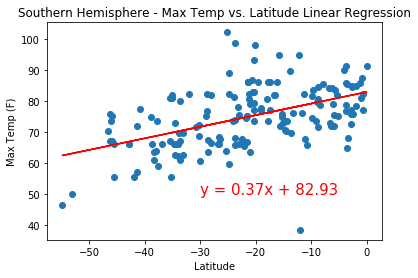

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Set y = mx + b
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Set the regression line
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(40, 15, 'y = 0.32x + 62.63')

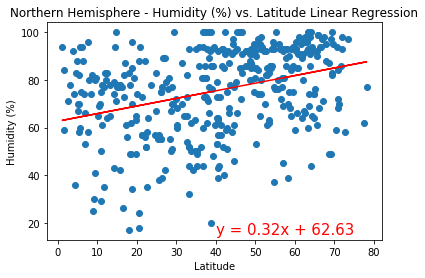

In [31]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Set y = mx + b
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Set the regression line
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(-40, 40, 'y = 0.49x + 83.39')

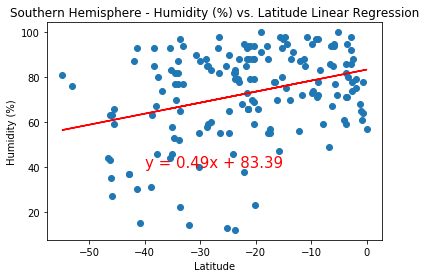

In [32]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Set y = mx + b
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Set a title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Set the regression line
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(40, 15, 'y = 0.75x + 19.45')

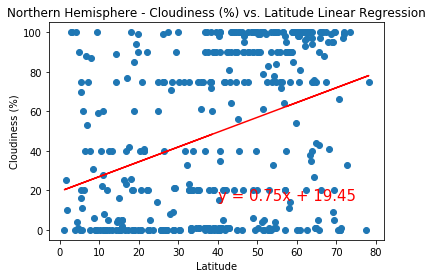

In [33]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Set y = mx + b
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Set the regression line
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(-30, 30, 'y = 0.39x + 67.54')

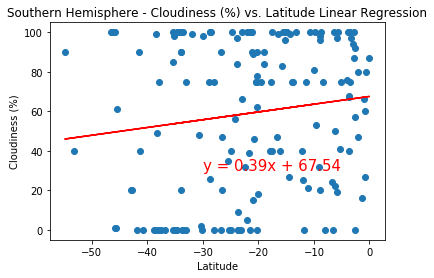

In [34]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Set y = mx + b
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Set the regression line
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(50, 25, 'y = 0.02x + 8.63')

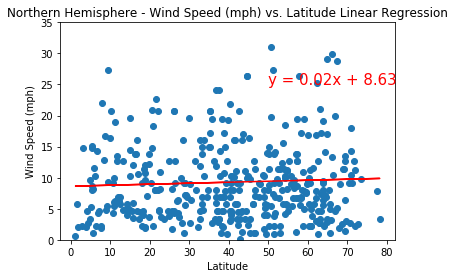

In [35]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Set y = mx + b
regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

plt.ylim(0, 35)

# Set the regression line
plt.plot(northern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(50,25),fontsize=15,color="red")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(-30, 25, 'y = -0.09x + 6.49')

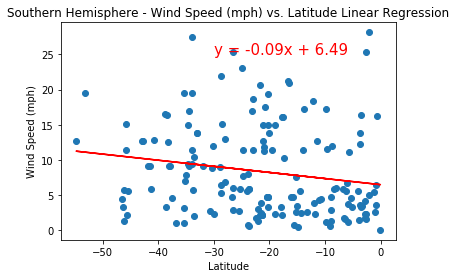

In [36]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Set y = mx + b
regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot using average tumor volume and weight
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Set the regression line
plt.plot(southern_hemisphere["Lat"],regress_values,"r-")

# Set the regression line label
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")